In [3]:
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install scipy
# !pip install causalinference
# !pip install causalnex==0.10.0

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
# import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('../Data/data.csv')


In [7]:
df = pd.DataFrame(df)


In [8]:
# setting index value with the id column value
# df.set_index('id', inplace=True)


In [9]:
# droping the unnamed value
df = df.drop("Unnamed: 32", axis=1)


In [10]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.shape


(569, 32)

In [12]:
df.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
df.columns.values
# 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst',


array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [14]:
df.get('diagnosis').value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B
list = ['id', 'diagnosis']
x = df.drop(list, axis=1)
x.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


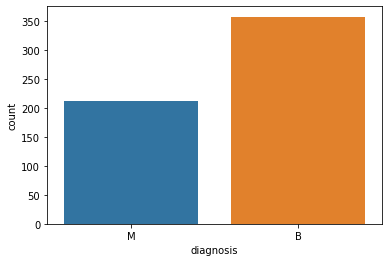

In [16]:
ax = sns.countplot(y, label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)


In [17]:
x.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


> > Visualization


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

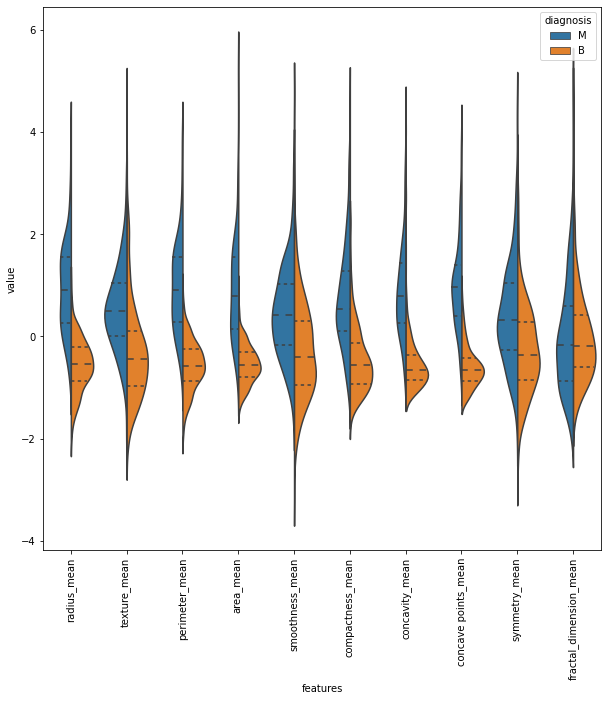

In [18]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis",
               data=data, split=True, inner="quart")
plt.xticks(rotation=90)


In texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

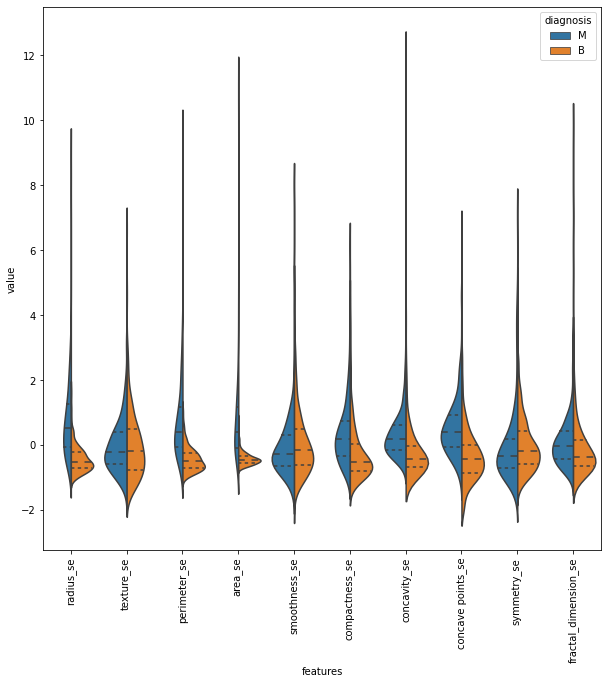

In [19]:
# Second ten features
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis",
               data=data, split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

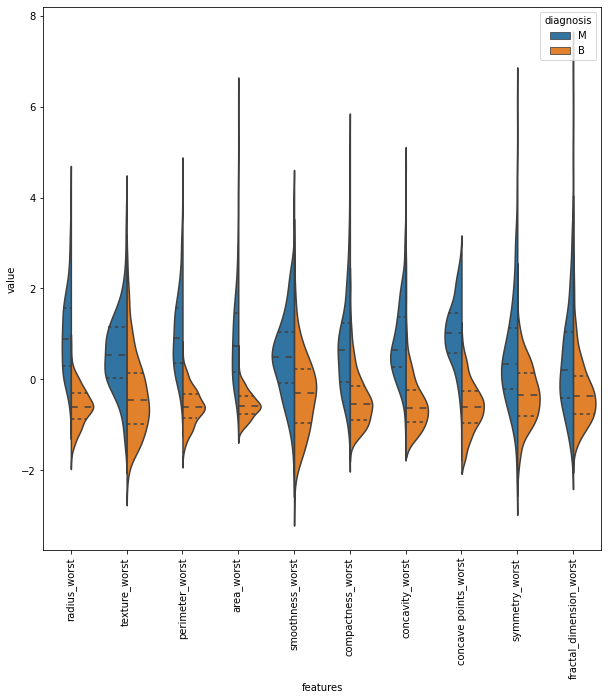

In [20]:
# the last ten features
data = pd.concat([y, data_n_2.iloc[:, 20:31]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis",
               data=data, split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

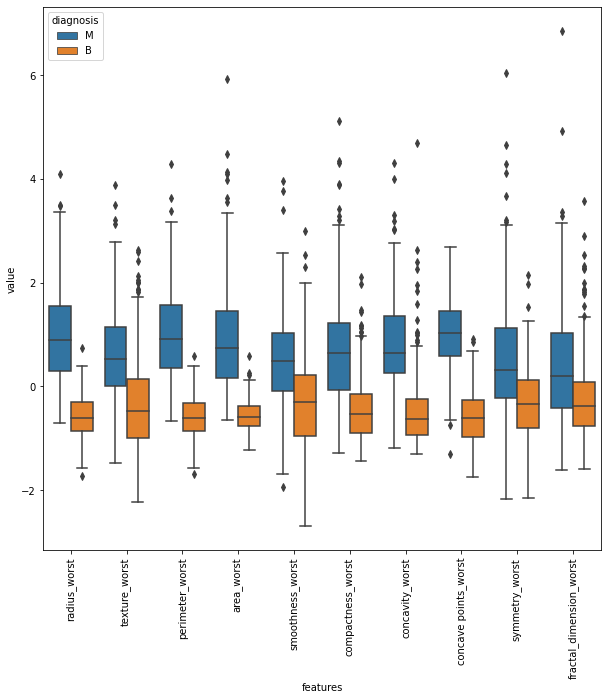

In [21]:
# with violin plot
plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)


Using joint plot we can see how much concavity_worst and concave points_worst are correlated with each other.


Personr: 0.855433860343999
p-value: 3.7640977296947246e-164


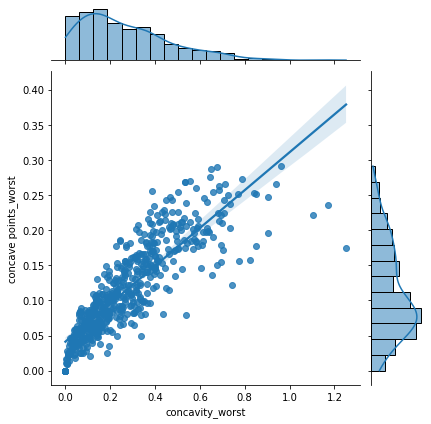

In [22]:
from scipy.stats import stats
sns.jointplot(x.loc[:, 'concavity_worst'],
              x.loc[:, 'concave points_worst'], kind="reg")
r, p = stats.pearsonr(x.loc[:, 'concavity_worst'],
                      x.loc[:, 'concave points_worst'])
print('Personr:', r)
print('p-value:', p)


0.86 is looks enough to say that they are correlated.


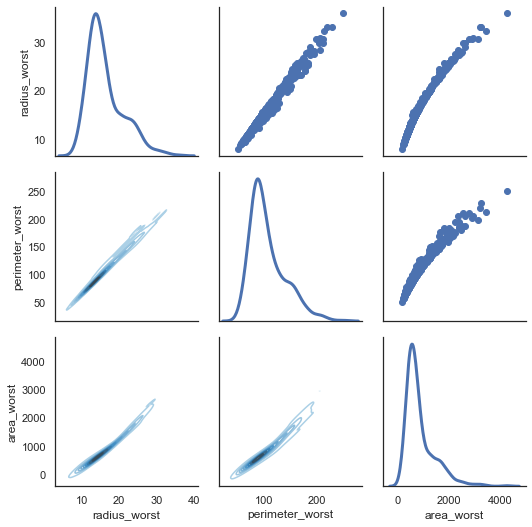

In [23]:
sns.set(style="white")
df = x.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


And in the above pair grid plot we can see radius_worst, perimeter_worst and area_worst are correlated. We definitely will use these discoveries for feature selection.


<AxesSubplot:>

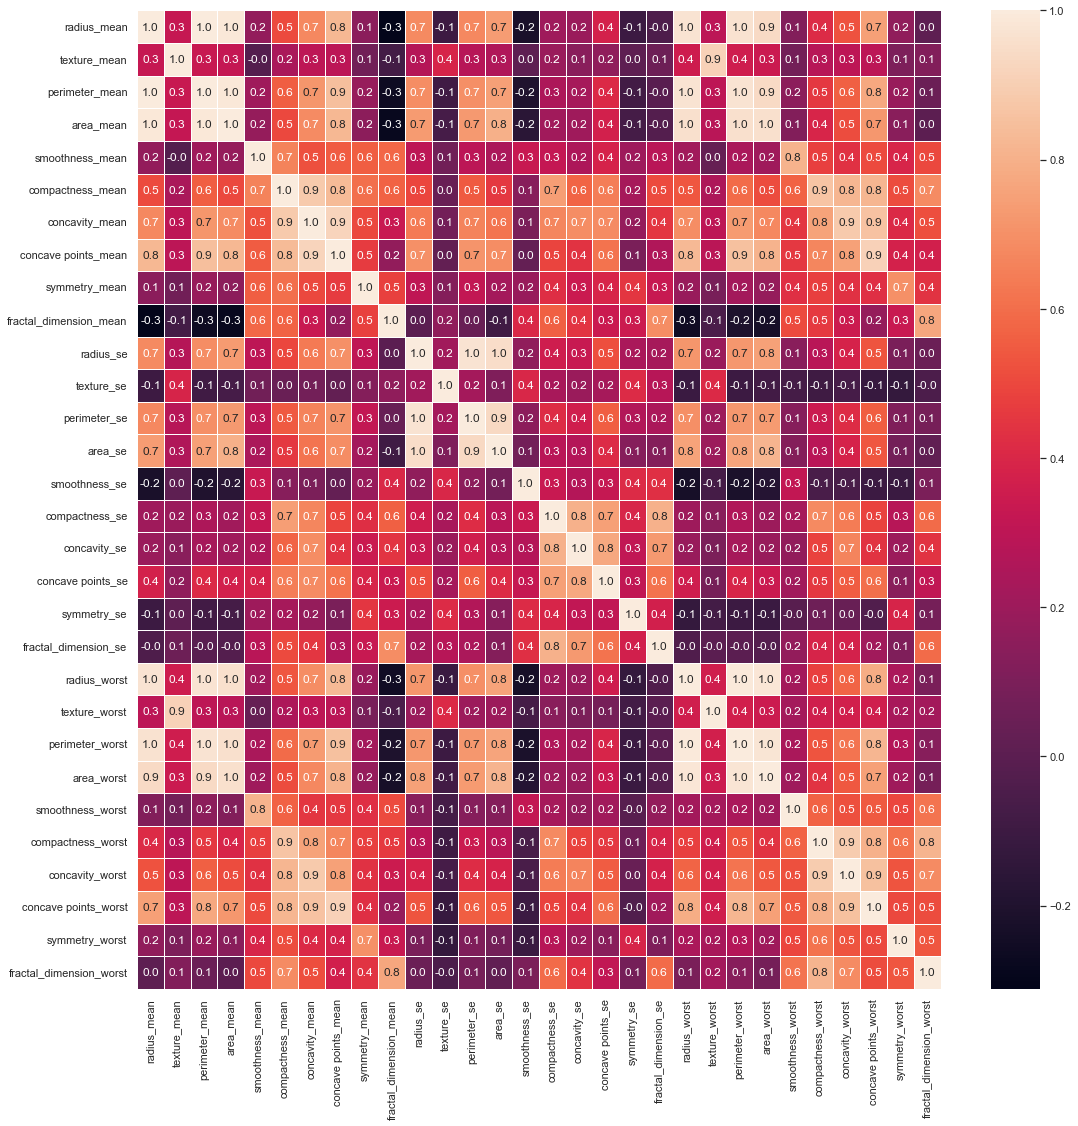

In [24]:
# correlation map
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)


> > Feature Extraction
> > With correlation and random classfication


As it can be seen in map heat figure above radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.


As it can be seen in map heat figure above radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.


In [25]:
drop_list1 = ['perimeter_mean', 'radius_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst',
              'perimeter_worst', 'compactness_worst', 'concave points_worst', 'compactness_se', 'concave points_se', 'texture_worst', 'area_worst']
x_1 = x.drop(drop_list1, axis=1)        # do not modify x, we will use it later
x_1.head()


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<AxesSubplot:>

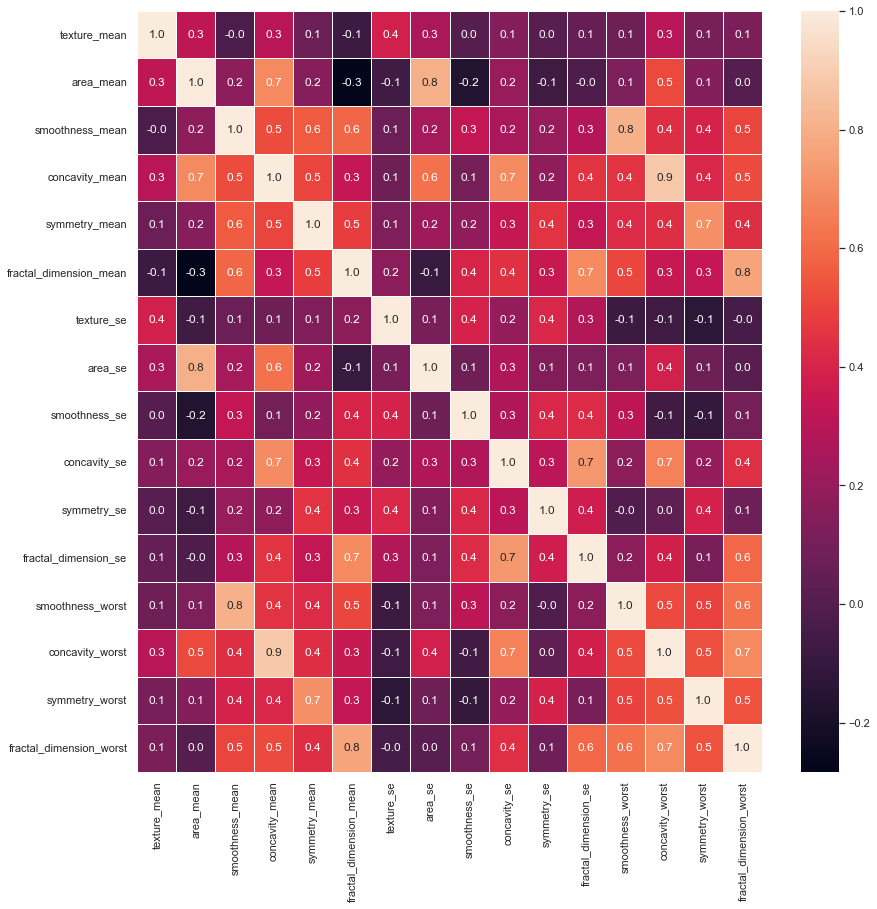

In [26]:
# correlation map
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)


After drop correlated features, as it can be seen in the above correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it. To see if the right features are picked let see the data we select with random forest and check the result


Accuracy is:  0.9649122807017544


<AxesSubplot:>

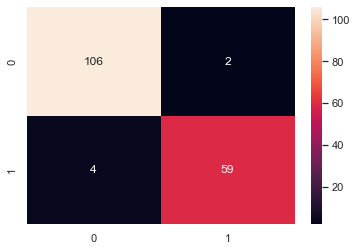

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(
    x_1, y, test_size=0.3, random_state=42)

# random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train, y_train)

ac = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")


Accuracy is almost 96% which is good but still need some work, so lets' go to the next method to get better result


> > Univairate Feature Extraction
> > With correlation and random classfication


In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.
In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)


In [29]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)


Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9532163742690059


<AxesSubplot:>

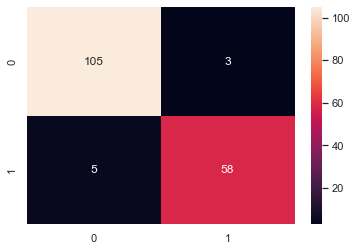

In [30]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
# random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(x_train_2, y_train)
ac_2 = accuracy_score(y_test, clf_rf_2.predict(x_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y_test, clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2, annot=True, fmt="d")


Accuracy is almost 96% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar. Now lets see other feature selection methods to find better results.


> > Recursive feature elimination (RFE) with random forest


Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, the 5 features will be choose by RFE method instead of our judgement choice.


In [31]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)


In [32]:
print('Chosen best 5 feature by rfe:', x_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'smoothness_worst',
       'concavity_worst'],
      dtype='object')


lets see how many feature we need to use with rfecv method.


> > Recursive feature elimination with cross validation and random forest classification


Now we will not only find best features but we also find how many features do we need for best accuracy.


In [33]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,
              scoring='accuracy')  # 5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])


Optimal number of features : 14
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_se',
       'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Finally, we find best 12 features that are texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst for best classification. Lets look at best accuracy with plot.


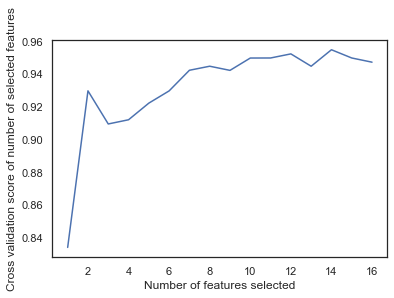

In [34]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


> > Tree based feature selection and random forest classification¶


In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.


Feature ranking:
1. feature 3 (0.204624)
2. feature 1 (0.200472)
3. feature 7 (0.178323)
4. feature 13 (0.129561)
5. feature 0 (0.055456)
6. feature 14 (0.045838)
7. feature 12 (0.039722)
8. feature 9 (0.023053)
9. feature 11 (0.019081)
10. feature 15 (0.017087)
11. feature 5 (0.017014)
12. feature 8 (0.016930)
13. feature 2 (0.014147)
14. feature 4 (0.014113)
15. feature 10 (0.013062)
16. feature 6 (0.011517)


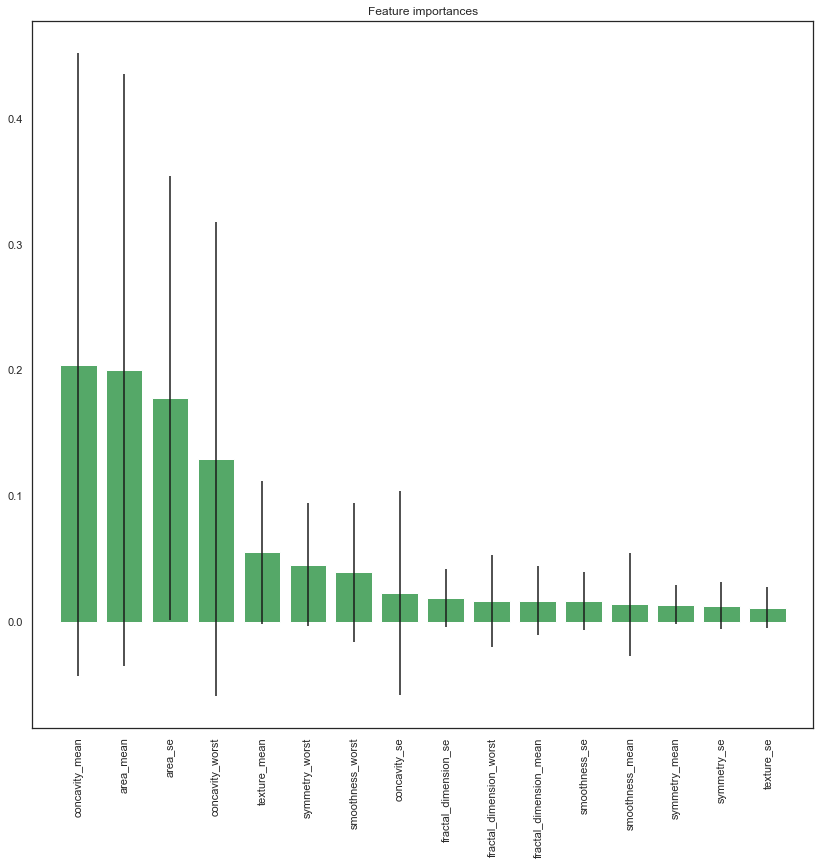

In [35]:
clf_rf_5 = RandomForestClassifier()
clr_rf_5 = clf_rf_5.fit(x_train, y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()


As seen in plot above, after 7 best features importance of features decrease. Therefore we can focus these 5 features. I give importance to understand features and find best of them.


In [36]:
new_list2 = ['area_mean', 'concavity_mean', 'area_se',
             'concavity_worst', 'symmetry_worst', 'texture_mean', 'concavity_se']
x_2 = x_1[new_list2].copy()
x_2.head()


,area_mean,concavity_mean,area_se,concavity_worst,symmetry_worst,texture_mean,concavity_se
0,1001.0,0.3001,153.40,0.7119,0.4601,10.38,0.05373
1,1326.0,0.0869,74.08,0.2416,0.2750,17.77,0.01860
2,1203.0,0.1974,94.03,0.4504,0.3613,21.25,0.03832
3,386.1,0.2414,27.23,0.6869,0.6638,20.38,0.05661
4,1297.0,0.1980,94.44,0.4000,0.2364,14.34,0.05688


> > Feature Extraction with PCA


principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA


Text(0, 0.5, 'explained_variance_ratio_')

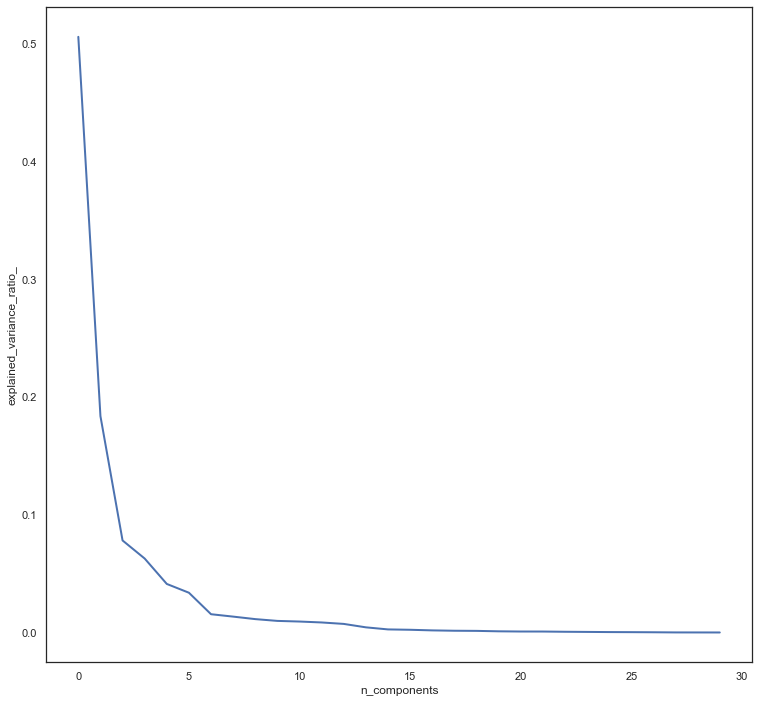

In [37]:
# split data train 70 % and test 30 %
from sklearn.decomposition import PCA
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)
# normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')


According to variance ration, 3 component can be chosen. In conclustion, I tried to show importance of feature selection and data visualization. Default data includes 33 feature but after feature selection we drop this number from 33 to 5 with accuracy 95%. In this kernel we just tried basic things, I am sure with these data visualization and feature selection methods, we can easily ecxeed the % 95 accuracy.


> > Data scaling - for selected feature


In [38]:
x_2['diagnosis'] = y    # do not modify x, we will use it later
x_2['diagnosis'] = x_2['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
x_2.head()


,area_mean,concavity_mean,area_se,concavity_worst,symmetry_worst,texture_mean,concavity_se,diagnosis
0,1001.0,0.3001,153.40,0.7119,0.4601,10.38,0.05373,1
1,1326.0,0.0869,74.08,0.2416,0.2750,17.77,0.01860,1
2,1203.0,0.1974,94.03,0.4504,0.3613,21.25,0.03832,1
3,386.1,0.2414,27.23,0.6869,0.6638,20.38,0.05661,1
4,1297.0,0.1980,94.44,0.4000,0.2364,14.34,0.05688,1


In [39]:
# s1 = [x_2, np.nan]
# pd.get_dummies(s1)


In [40]:
# 2. create a min max processing object
from sklearn import preprocessing
scale_train_list = x_2.columns.to_list()


def standardize_columns(x_2, column) -> pd.DataFrame:
    try:
        std_column_df = pd.DataFrame(x_2[column])
        std_column_values = std_column_df.values
        # standardizer = StandardScaler()
        # normalized_data = standardizer.fit_transform(std_column_values)
        min_max_scaler = preprocessing.MinMaxScaler()
        scaled_array = min_max_scaler.fit_transform(std_column_values)
        x_2[column] = scaled_array
        print('Successfull data scaling')
        return x_2.head()
    except:
        print('error in scaling data')


standardize_columns(x_2, scale_train_list)


Successfull data scaling


,area_mean,concavity_mean,area_se,concavity_worst,symmetry_worst,texture_mean,concavity_se,diagnosis
0,0.363733,0.703140,0.273811,0.568610,0.598462,0.022658,0.135682,1.0
1,0.501591,0.203608,0.125660,0.192971,0.233590,0.272574,0.046970,1.0
2,0.449417,0.462512,0.162922,0.359744,0.403706,0.390260,0.096768,1.0
3,0.102906,0.565604,0.038155,0.548642,1.000000,0.360839,0.142955,1.0
4,0.489290,0.463918,0.163688,0.319489,0.157500,0.156578,0.143636,1.0


> > Causal Inference


These features describe characteristics of the cell nuclei present in the image and can be used to build a model to predict whether a tumor is benign or malignant.


In [41]:
# !pip install causalnex
# !apt install libgraphviz-dev
# !pip install pygraphviz


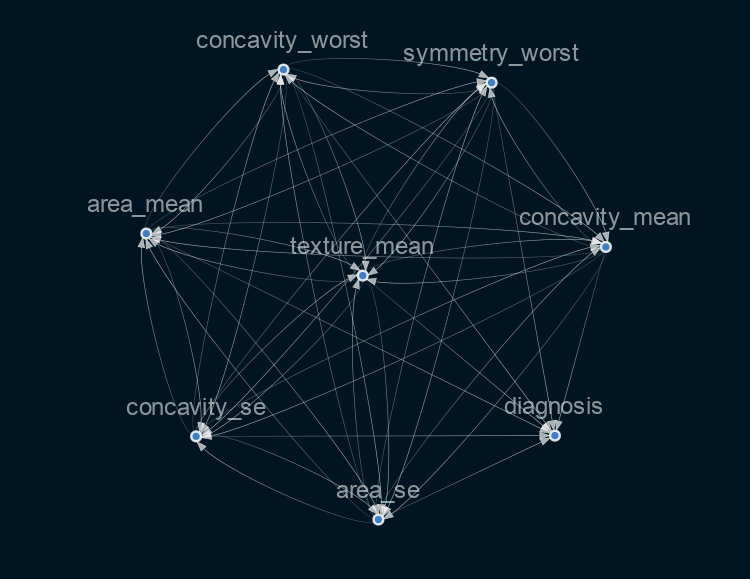

In [42]:
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE


def vis_sm(sm):
    viz = plot_structure(sm, graph_attributes={"scale": "2.0",
                                               'size': 2.5}, all_node_attributes=NODE_STYLE.WEAK,
                         all_edge_attributes=EDGE_STYLE.WEAK)
    return Image(viz.draw(format='png'))


sm = from_pandas(x_2.iloc[:, :9], tabu_parent_nodes=['diagnosis'],)
vis_sm(sm)


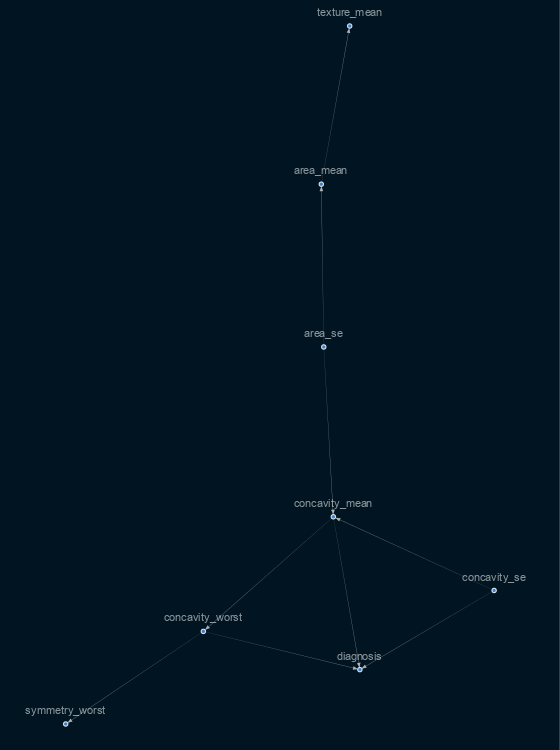

In [43]:
sm.remove_edges_below_threshold(0.8)
vis_sm(sm)


**Comparison** with Jaccard Similarity Index


In [44]:
x_selected = x_2.copy()
# x_selected['diagnosis'] = y    # do not modify x, we will use it later
# x_selected['diagnosis'] = x_selected['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
# # x_selected.head()
# scale_train_list = x_selected.columns.to_list()
# standardize_columns(x_selected, scale_train_list)


In [45]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return "{0:.0%}".format(round(len(i) / (len(g) + len(h) - len(i)), 3))


**Causal graph with 60% data**


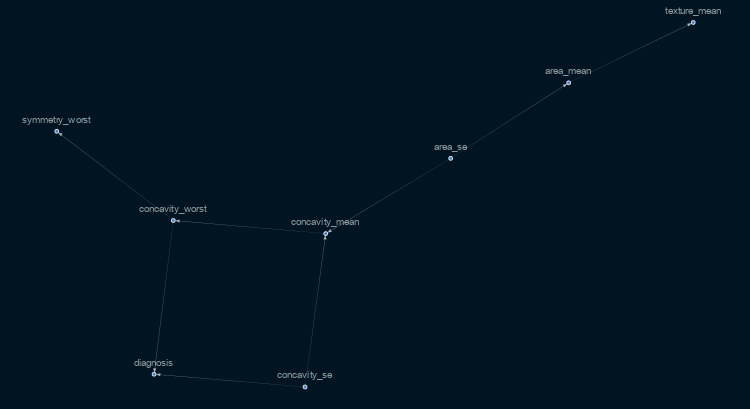

In [46]:
portion = int(x_selected.shape[0]*.6)
x_portion = x_selected.head(portion)
sm2 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm2.remove_edges_below_threshold(0.8)
sm2 = sm2.get_largest_subgraph()
vis_sm(sm2)


**Causal graph with 70% data**


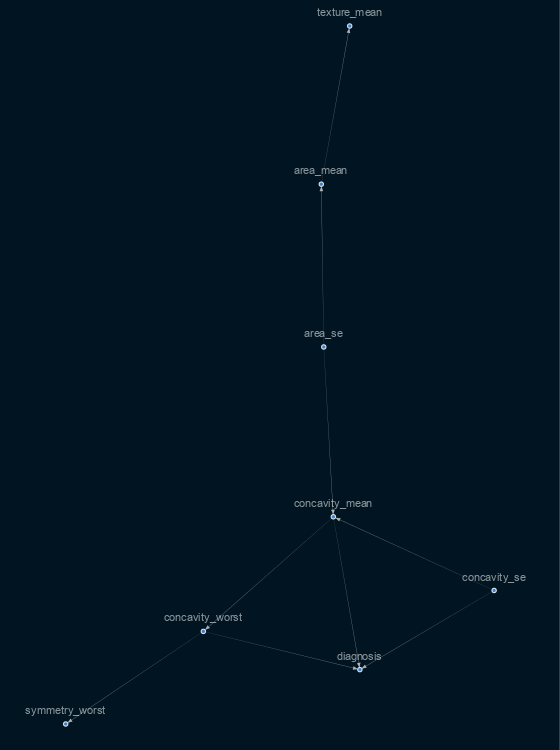

In [47]:
portion = int(x_selected.shape[0]*.7)
x_portion = x_selected.head(portion)
sm3 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm3.remove_edges_below_threshold(0.8)
sm3 = sm3.get_largest_subgraph()
vis_sm(sm3)


In [48]:
jaccard_similarity(sm2.edges, sm3.edges)


'89%'

The Jaccard similarity b/n the casual graph of 60% and 70% of the data is 89%.


**Causal graph with 80% data**


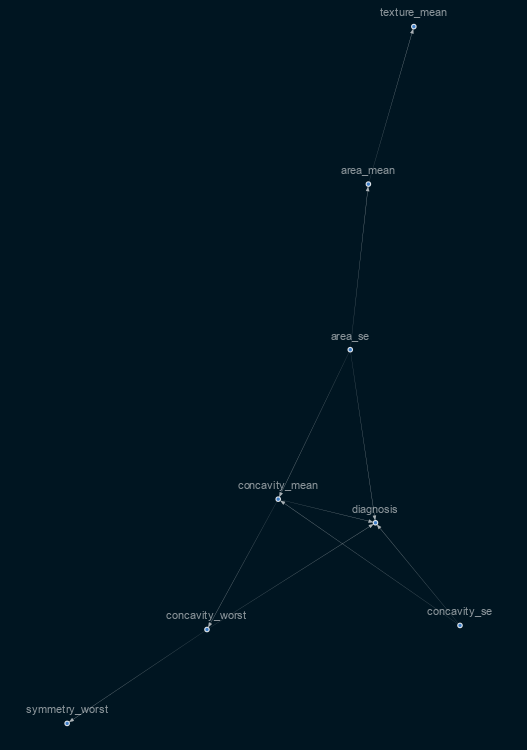

In [49]:
portion = int(x_selected.shape[0]*.8)
x_portion = x_selected.head(portion)
sm4 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm4.remove_edges_below_threshold(0.8)
sm4 = sm4.get_largest_subgraph()
vis_sm(sm4)


In [50]:
jaccard_similarity(sm3.edges, sm4.edges)


'90%'

The Jaccard similarity b/n the casual graph of 70% and 80% of the data is 90%.


**Causal graph with 90% data**


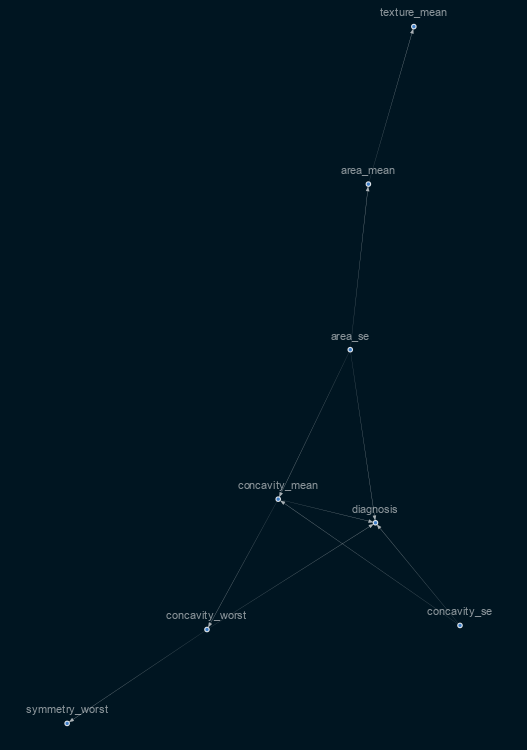

In [51]:
portion = int(x_selected.shape[0]*.9)
x_portion = x_selected.head(portion)
sm5 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm5.remove_edges_below_threshold(0.8)
sm5 = sm5.get_largest_subgraph()
vis_sm(sm4)


In [52]:
jaccard_similarity(sm4.edges, sm5.edges)


'90%'

The Jaccard similarity b/n the casual graph of 80% and 90% of the data is 90%.


**Causal graph with 100% data**


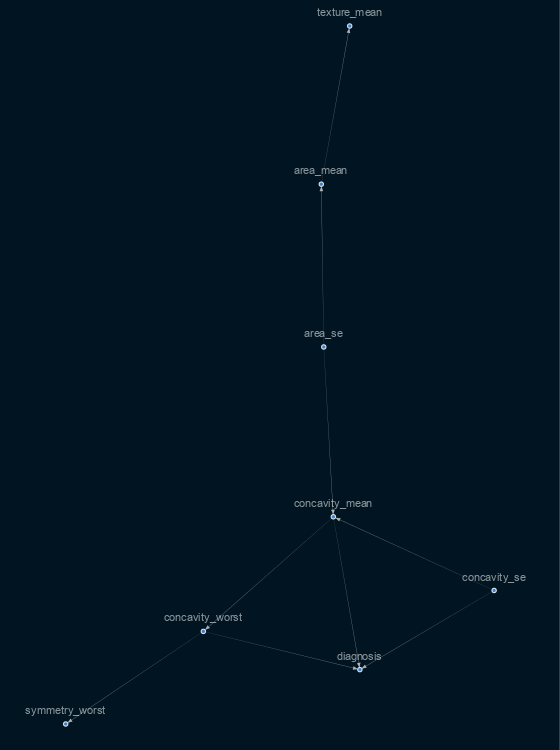

In [53]:
portion = int(x_selected.shape[0]*1.0)
x_portion = x_selected.head(portion)
sm6 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm6.remove_edges_below_threshold(0.8)
sm6 = sm6.get_largest_subgraph()
vis_sm(sm6)


In [54]:
jaccard_similarity(sm5.edges, sm6.edges)


'100%'

The Jaccard similarity b/n the casual graph of 90% and 100% of the data is 100%.


we can conclude that everytime we increase the fraction of the data and the compare the jaccard similarity it is more than 80% in all comparision so we can conclude this causal graph is stable


**Markov blanket**
To select only variables that point directly to the target variable, in these case the target variable is the diagnosis as used above


In [59]:
from causalnex.network import BayesianNetwork
from causalnex.utils.network_utils import get_markov_blanket
bn = BayesianNetwork(sm)
blanket = get_markov_blanket(bn, 'diagnosis')
# list(blanket.structure.edges)
print(blanket.edges)


[('concavity_mean', 'concavity_worst'), ('concavity_mean', 'diagnosis'), ('concavity_worst', 'diagnosis'), ('concavity_se', 'concavity_mean'), ('concavity_se', 'diagnosis')]


so the nearest variables to the target variable from the feature we extracted and used so far are concavity_mean,convaity_worst and concavity_se

In [56]:
# train_data = x_2.copy()
# test_data = train_data.diagnosis                          # M or B
# list = ['diagnosis']
# train_data = train_data.drop(list,axis = 1 )
# train_data.head()


In [57]:
from causalnex.discretiser.discretiser_strategy import (
    DecisionTreeSupervisedDiscretiserMethod)
features = ['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
            'symmetry_worst', 'texture_mean', 'concavity_se', 'diagnosis']

tree_discretiser = DecisionTreeSupervisedDiscretiserMethod(
    mode='single',
    tree_params={'max_depth': 3, 'random_state': 27},
)
tree_discretiser.fit(
    feat_names=features,
    dataframe=x_selected,
    target_continuous=True,
    target='diagnosis',
)
discretised_data = x_selected.copy()
for col in features:
    discretised_data[col] = tree_discretiser.transform(x_selected[[col]])
# discretised_data


In [58]:
from sklearn.metrics import recall_score, precision_score
train, test = train_test_split(
    discretised_data, train_size=0.8, test_size=0.2, random_state=27)
bn = BayesianNetwork(sm)
bn = bn.fit_node_states(discretised_data)
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

pred = bn.predict(test, 'diagnosis')
true = np.where(test['diagnosis'] == 0, 1, 0)
pred = np.where(pred == 0, 1, 0)

print('Recall: {:.2f}'.format(recall_score(y_true=true, y_pred=pred)))
print('F1: {:.2f} '.format(f1_score(y_true=true, y_pred=pred)))
print('Accuracy: {:.2f} '.format(accuracy_score(y_true=true, y_pred=pred)))
print('Precision: {:.2f} '.format(precision_score(y_true=true, y_pred=pred)))


Recall: 1.00
F1: 0.93 
Accuracy: 0.90 
Precision: 0.86 
